In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
df=pd.read_csv("Housing.csv")

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning
0,13300000,7420,4,2,3,yes,no,no,yes
1,12250000,8960,4,4,4,yes,no,no,yes
2,12250000,9960,3,2,2,yes,no,no,no
3,12215000,7500,4,2,2,yes,no,no,yes
4,11410000,7420,4,1,2,yes,yes,no,yes


In [12]:
col=["mainroad", "guestroom", "hotwaterheating", "airconditioning"]
df[col]=df[col].replace({'yes': 1, 'no':0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15556\1486621624.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace({'yes': 1, 'no':0})


In [13]:
x=df.drop('price', axis=1)
y=df['price']

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
li=LinearRegression()
li.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred=li.predict(x_test)

In [19]:
r2=r2_score(y_pred, y_test)
mse=mean_squared_error(y_pred, y_test)
print(r2)
print(mse)

0.027349395242002195
1876184270377.4539


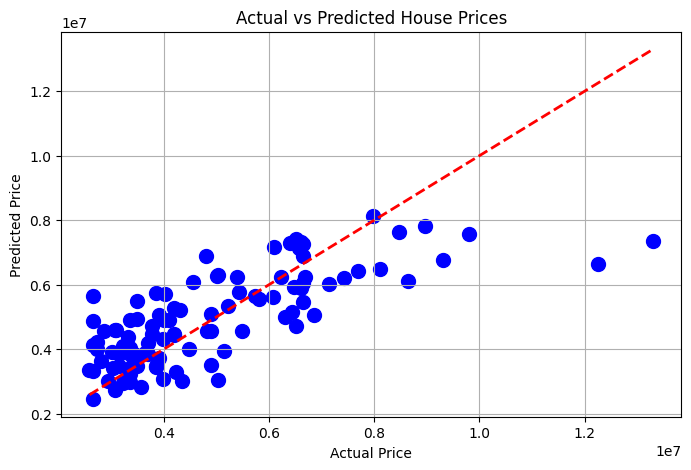

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', s=100)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()